# 练习题 Exercise

## ex.1

Q:将所有权重初始化为相同的值是否可以(只要该值是使用He初始化随机选择的)? 

> **No, all weights should be sampled independently**; they should not all have the same initial value. One important goal of sampling weights randomly is to **break symmetry**: if all the weights have the same initial value, even if that value is not zero, then symmetry is not broken (i.e., all neurons in a given layer are equivalent), and backpropagation will be unable to break it. Concretely, this means that all the neurons in any given layer will always have the same weights. It’s like having just one neuron per layer, and much slower. It is virtually impossible for such a configuration to converge to a good solution.

## ex.2 

Q:将偏置项初始化为0可以嘛?

> **It is perfectly fine to initialize the bias terms to zero.** Some people like to initialize them just like weights, and that’s okay too; it does not make much difference.

## ex.3

Q:列举SELU激活函数相比ReLU 三个优点.

> A few advantages of the SELU function over the ReLU function are:
1. **It can take on negative values**, so the average output of the neurons in any given layer is typically closer to zero than when using the ReLU activation function (which never outputs negative values). This helps alleviate the vanishing gradients problem.
2. **It always has a nonzero derivative**, which avoids the dying units issue that can affect ReLU units.
3. When the conditions are right (i.e., if the model is **sequential**, and the weights are initialized using **LeCun initialization**, and the inputs are **standardized**, and there’s **no incompatible** layer or regularization, such as dropout or $ℓ_1$ regularization), then **the SELU activation function ensures the model is selfnormalized**, which solves the exploding/vanishing gradients problems.

## ex.4

Q:在哪种情况下,你想使用以下每个激话函数:SELU、 leaky RELU(及其变体) ReLU、tanh, logistic和 softmax?

> **The SELU activation function is a good default.** If you need the neural network to be as **fast** as possible, you can use one of the **leaky ReLU variants** instead (e.g., a simple leaky ReLU using the default hyperparameter value). The simplicity of the ReLU activation function makes it many people’s preferred option, despite the fact that it is generally outperformed by SELU and leaky ReLU. However, **the ReLU activation function’s ability to output precisely zero can be useful in some cases**(e.g., see Chapter 17). Moreover, it can sometimes benefit from optimized implementation as well as from hardware acceleration. **The hyperbolic tangent (tanh) can be useful in the output layer if you need to output a number between –1 and 1,** but nowadays it is not used much in hidden layers (except in recurrentnets). **The logistic activation function is also useful in the output layer** when you need to estimate a probability (e.g., for binary classification), but is rarely used in hidden layers (there are exceptions—for example, for the coding layer of variational autoencoders; see Chapter 17). Finally, **the softmax activation function is useful in the output layer to output probabilities for mutually exclusive classes**, but it is rarely (if ever) used in hidden layers.

## ex.5

Q:如果在使用SGD优化器时将超参数 momentum设置得太接近1(例如0.999),会发生什么情况?

> If you set the momentum hyperparameter too close to 1 (e.g., 0.99999) when using an SGD optimizer, then **the algorithm will likely pick up a lot of speed, hopefully moving roughly toward the global minimum, but its momentum will carry it right past the minimum. Then it will slow down and come back, accelerate again, overshoot again, and so on. It may oscillate this way many times before converging,** so overall it will take much longer to converge than with a smaller momentum value.

## ex.6

Q:列举三种能产生稀疏模型的方法

> One way to produce a sparse model (i.e., with most weights equal to zero) is to train the model normally, then **zero out tiny weights.** For more sparsity, you can **apply $ℓ_1$ regularization during training**, which pushes the optimizer toward sparsity. A third option is to **use the TensorFlow Model Optimization Toolkit**.

## ex.7

Q:Dropout会减慢训练速度吗?它会减慢推理速度(即对新实例进行预测)吗?MC 呢?

> Yes, **dropout does slow down training**, in general roughly by a factor of two. However, it has **no impact on inference speed since it is only turned on during training.** **MC Dropout is exactly like dropout during training,** but it is still active during inference, **so each inference is slowed down slightly.** More importantly, when using MC Dropout you generally want to run inference 10 times or more to get better predictions. This means that making predictions is slowed down by a factor of 10 or more.

## ex.8

在`CFAR10`图像数据集上练习训练深度神经网络:
>1. 构建一个`DNN`,其中包含20个隐藏的层,毎个层包含100个神经元(这太多了,但这是本练习的重点)。使用He初始化和ELU激话函数.
2. 使用 `Nadam优化`和`提前停止`,在 `CIFA10`数据集上训练网络。你可以使用 `keras.datasets.cifar10.1oad_data()`加载它。该数据集由10个类别的60000个32×32像素的彩色图像(50000个用于训练,10000个用于测试) 组成,因此你需要一个具有10个神经元的 `softmax`输出层。记住,每次更改模型的架构或超参数时,都要寻找正确的学习率。
3. 现在尝试添加`批量归一化`并比较学习曲线:收敛速度是否比以前快?会产生更好的模型吗?它如何影响训练速度?
4. 尝试用`SELU`替换`批量归一化`,并进行必要的调整以确保网络是自归一化的(即归一化输入特征,使用`Lecun正态初始化`,确保`DNN`仅仅包含一系列的密集层等)。
5. 尝试使用 `Alpha Dropout`正则化模型。然后,在不重新训练模型的情况下,看看是否可以使用 `MC Dropout`获得更好的准确率。
6. 使用`1周期调度`来重新训练模型,看看它是否可以提高训练速度和模型谁确。

### ex.8.1

Exercise: Build a `DNN` with 20 hidden layers of 100 neurons each (that's too many, but it's the point of this exercise). Use `He initialization` and the `ELU` activation function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))   # RGB彩色图像

for layer in range(20):
    model.add(keras.layers.Dense(100, activation=keras.activations.elu,
                                 kernel_initializer = keras.initializers.he_normal))

### ex.8.2

Exercise: Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with `keras.datasets.cifar10.load_data()`. The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you'll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model's architecture or hyperparameters.

1. Load the `CIFAR10` dataset

In [4]:
CIFAR10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = CIFAR10.load_data()

X_train_full.shape, X_test.shape, X_train_full.dtype

((50000, 32, 32, 3), (10000, 32, 32, 3), dtype('uint8'))

In [5]:
X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_val = X_train_full[:5000]
y_val = y_train_full[:5000]

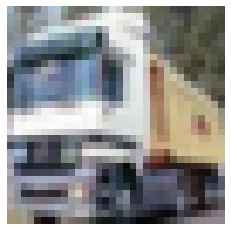

In [6]:
plt.imshow(X_train_full[1])
plt.axis('off')
plt.show()

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship','truck']

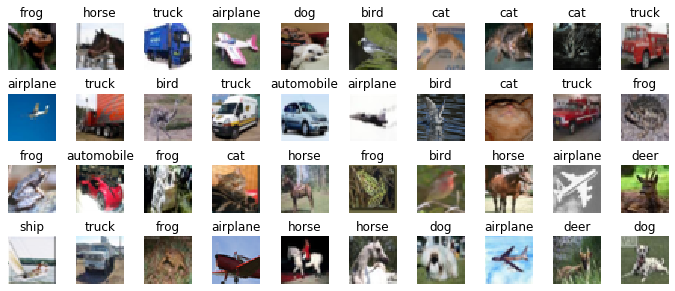

In [8]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)   # 调整子图布局
plt.show()

2. Add output layer to the model

In [9]:
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

3. Use a `Nadam` optimizer with a learning rate of `5e-5`   **ex.2.1**

In [10]:
optimiter = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(optimizer=optimiter,
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=[keras.metrics.sparse_categorical_accuracy])

4. Create the callbacks we need and train the model

In [11]:
# `ModelCheckpoint`回调会定期保存模型的检查点
# `EarlyStopping`回调，如果在多个轮次的验证集上没有任何进展，它将中断训练，并且可以选择回滚到最佳模型.

model_checkpoint_cb = keras.callbacks.ModelCheckpoint("CIFAR10_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)

In [12]:
import os
run_index = 1
run_logdir = os.path.join(os.curdir, "my_CIFAR10_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_CIFAR10_logs/run_001'

In [13]:
# TensorBoard进行可视化

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [14]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[model_checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1407/1407 [==============================] - 12s 7ms/step - loss: 3.9557 - sparse_categorical_accuracy: 0.1675 - val_loss: 2.1308 - val_sparse_categorical_accuracy: 0.2258
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.0501 - sparse_categorical_accuracy: 0.2529 - val_loss: 2.1700 - val_sparse_categorical_accuracy: 0.2254
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9334 - sparse_categorical_accuracy: 0.2917 - val_loss: 2.0268 - val_sparse_categorical_accuracy: 0.2602
Epoch 4/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8547 - sparse_categorical_accuracy: 0.3232 - val_loss: 1.9004 - val_sparse_categorical_accuracy: 0.3268
Epoch 5/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.7879 - sparse_categorical_accuracy: 0.3476 - val_loss: 1.8044 - val_sparse_categorical_accuracy: 0.3448
Epoch 6/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.73

In [2]:
%load_ext tensorboard
%tensorboard --logdir=./my_CIFAR10_logs --port=6061

In [16]:
model = keras.models.load_model("CIFAR10_model.h5")
model.evaluate(X_val, y_val)

157/157 [==============================] - 0s 1ms/step - loss: 1.4858 - sparse_categorical_accuracy: 0.4712


[1.4858437776565552, 0.47119998931884766]

#### ex.2.1 

参考第十章练习`ex.10`(请尝试使用本章介绍的方法来寻找最佳学习率(即通过成倍地提高学习率,画出误差,并找出误差发生的点)。),寻找最佳学习率并训练.

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))   # RGB彩色图像

for layer in range(20):
    model.add(keras.layers.Dense(100, activation=keras.activations.elu,
                                 kernel_initializer = keras.initializers.he_normal))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

We will start with a small learning rate of `1e-5`, and grow it by 0.6% at each iteration.

In [18]:
optimiter = keras.optimizers.Nadam(learning_rate=1e-5)
model.compile(optimizer=optimiter,
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [19]:
class expLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch ,logs):
        lr_var = self.model.optimizer.learning_rate
        self.rates.append(keras.backend.get_value(lr_var))
        self.losses.append(logs["loss"])
        
        keras.backend.set_value(x=lr_var, value=lr_var*self.factor)

exp_lr = expLearningRate(factor=1.006)   # 0.6%

Train the model for just 1 epoch

In [20]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_val, y_val),
                    callbacks=[exp_lr]
                   )

1407/1407 [==============================] - 14s 8ms/step - loss: 984677184.0000 - sparse_categorical_accuracy: 0.1180 - val_loss: 2.3067 - val_sparse_categorical_accuracy: 0.1040


Plot the loss as a function of the learning rate

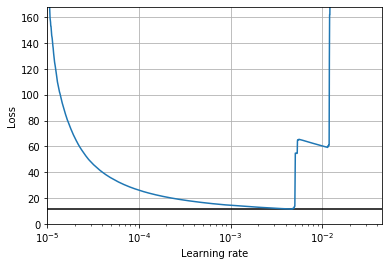

In [21]:
plt.plot(exp_lr.rates, exp_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(y=min(exp_lr.losses), xmin=min(exp_lr.rates), xmax=max(exp_lr.rates))
plt.axis([min(exp_lr.rates), max(exp_lr.rates), 0, exp_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

> 最佳学习率将比损失开始攀升的点低一些（通常比转折点低约10倍）

The loss starts shooting back up violently when the learning rate goes over `5e-3`, so let's try using half of that, at `5e-4`

### ex 8.3

Exercise: Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

The code below is very similar to the code above, with a few changes:

* I **added a `BN layer` after every Dense layer** (before the activation function), except for the output layer. I also added a BN layer before the first hidden layer.
* I **changed the learning rate to `5e-4`.** I experimented with 1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3 and 3e-3, and I chose the one with the best validation performance after 20 epochs.
* I **renamed** the run directories to `run_bn_*` and the model file name to `my_cifar10_bn_model.h5`.

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))   # RGB彩色图像
model.add(keras.layers.BatchNormalization())

for layer in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer = keras.initializers.he_normal))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(keras.activations.elu))
    
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

In [23]:
optimiter = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(optimizer=optimiter,
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [24]:
run_index = 1
run_logdir = os.path.join(os.curdir, "my_CIFAR10_logs", "run_bn_{:03d}".format(run_index))
run_logdir

'./my_CIFAR10_logs/run_bn_001'

In [25]:
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("CIFAR10_bn_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [26]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[model_checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1407/1407 [==============================] - 23s 11ms/step - loss: 1.8428 - sparse_categorical_accuracy: 0.3392 - val_loss: 1.7139 - val_sparse_categorical_accuracy: 0.3838
Epoch 2/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6691 - sparse_categorical_accuracy: 0.4052 - val_loss: 1.5838 - val_sparse_categorical_accuracy: 0.4316
Epoch 3/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5998 - sparse_categorical_accuracy: 0.4322 - val_loss: 1.5121 - val_sparse_categorical_accuracy: 0.4566
Epoch 4/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.5484 - sparse_categorical_accuracy: 0.4493 - val_loss: 1.5026 - val_sparse_categorical_accuracy: 0.4710
Epoch 5/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.5066 - sparse_categorical_accuracy: 0.4654 - val_loss: 1.4490 - val_sparse_categorical_accuracy: 0.4800
Epoch 6/100
1407/1407 [==============================] - 14s 10ms/step - lo

In [27]:
model = keras.models.load_model("CIFAR10_bn_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3270 - sparse_categorical_accuracy: 0.5376


[1.3270126581192017, 0.5375999808311462]

* **Is the model converging faster than before?** 
    
        Much faster! The previous model took 27 epochs to reach the lowest validation loss, while the new model achieved that same loss in just 5 epochs and continued to make progress until the 16th epoch. The BN layers stabilized training and allowed us to use a much larger learning rate, so convergence was faster.
* **Does BN produce a better model?** 

        Yes! The final model is also much better, with 54.0% accuracy instead of 47.6%. It's still not a very good model, but at least it's much better than before (a Convolutional Neural Network would do much better, but that's a different topic, see chapter 14).
* **How does BN affect training speed?** 
        Although the model converged much faster, each epoch took about 12s instead of 8s, because of the extra computations required by the BN layers. But overall the training time (wall time) was shortened significantly!

### ex.8.4

Exercise: Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).

In [28]:
# 输入标准化
pixel_means = X_train.mean(axis=0)
pixel_stds = X_train.std(axis=0)

X_train_scaled = (X_train - pixel_means) / pixel_stds
X_val_scaled = (X_val - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))   # RGB彩色图像

for layer in range(20):
    model.add(keras.layers.Dense(100, 
                                 activation = keras.activations.selu,
                                 kernel_initializer = keras.initializers.lecun_normal))
    
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

In [30]:
optimiter = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(optimizer=optimiter,
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [31]:
run_index = 1
run_logdir = os.path.join(os.curdir, "my_CIFAR10_logs", "run_selu_{:03d}".format(run_index))
run_logdir

'./my_CIFAR10_logs/run_selu_001'

In [32]:
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("CIFAR10_selu_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [33]:
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[model_checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1407/1407 [==============================] - 12s 7ms/step - loss: 1.9446 - sparse_categorical_accuracy: 0.2992 - val_loss: 2.0623 - val_sparse_categorical_accuracy: 0.2600
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7300 - sparse_categorical_accuracy: 0.3798 - val_loss: 1.8109 - val_sparse_categorical_accuracy: 0.3386
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6277 - sparse_categorical_accuracy: 0.4217 - val_loss: 1.6910 - val_sparse_categorical_accuracy: 0.3758
Epoch 4/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.5590 - sparse_categorical_accuracy: 0.4466 - val_loss: 1.6417 - val_sparse_categorical_accuracy: 0.4310
Epoch 5/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5028 - sparse_categorical_accuracy: 0.4729 - val_loss: 1.5801 - val_sparse_categorical_accuracy: 0.4468
Epoch 6/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.45

In [34]:
model = keras.models.load_model("CIFAR10_selu_model.h5")
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4674 - sparse_categorical_accuracy: 0.4928


[1.4674023389816284, 0.4927999973297119]

We get 47.9% accuracy, which is not much better than the original model (47.6%), and not as good as the model using batch normalization (54.0%). However, convergence was almost as fast as with the BN model, plus each epoch took only 7 seconds. So it's by far the fastest model to train so far.

### ex.8.5

Exercise: Try regularizing the model with `alpha dropout`. Then, without retraining your model, see if you can achieve better accuracy using `MC Dropout`.

- `Alpha dropout`

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))   # RGB彩色图像

for layer in range(20):
    model.add(keras.layers.Dense(100, 
                                 activation = keras.activations.selu,
                                 kernel_initializer = keras.initializers.lecun_normal))

model.add(keras.layers.AlphaDropout(rate=0.1))
    
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

In [36]:
optimiter = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(optimizer=optimiter,
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [37]:
run_index = 1
run_logdir = os.path.join(os.curdir, "my_CIFAR10_logs", "run_AlphaDropout_{:03d}".format(run_index))
run_logdir

'./my_CIFAR10_logs/run_AlphaDropout_001'

In [38]:
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("CIFAR10_AlphaDropout_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [39]:
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[model_checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1407/1407 [==============================] - 13s 7ms/step - loss: 1.8972 - sparse_categorical_accuracy: 0.3239 - val_loss: 1.7620 - val_sparse_categorical_accuracy: 0.3804
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6667 - sparse_categorical_accuracy: 0.4095 - val_loss: 1.7141 - val_sparse_categorical_accuracy: 0.4068
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5734 - sparse_categorical_accuracy: 0.4482 - val_loss: 1.6491 - val_sparse_categorical_accuracy: 0.4276
Epoch 4/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5065 - sparse_categorical_accuracy: 0.4684 - val_loss: 1.5978 - val_sparse_categorical_accuracy: 0.4496
Epoch 5/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4528 - sparse_categorical_accuracy: 0.4922 - val_loss: 1.5711 - val_sparse_categorical_accuracy: 0.4652
Epoch 6/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.40

In [40]:
model = keras.models.load_model("CIFAR10_AlphaDropout_model.h5")
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.5026 - sparse_categorical_accuracy: 0.4827


[1.5026135444641113, 0.482699990272522]

The model reaches 48.9% accuracy on the validation set. That's very slightly better than without dropout (47.6%). With an extensive hyperparameter search, it might be possible to do better (I tried dropout rates of 5%, 10%, 20% and 40%, and learning rates 1e-4, 3e-4, 5e-4, and 1e-3), but probably not much better in this case.

- `MC dropout`

In [41]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [42]:
#isinstance() 函数来判断一个对象是否是一个已知的类型
#遍历所有层，是dropout层就执行mc dropout操作，然后添加到神经网络中，不是就直接添加

mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers   # 与我们刚刚训练的模型相同
])

In [43]:
# 多次运行模型（默认情况下为10次），并返回平均预测类概率
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

# 使用这些平均概率来预测每个实例最可能的类别
def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [44]:
# 对验证集中的所有实例进行预测，并计算精度
y_pred = mc_dropout_predict_classes(mc_model, X_val_scaled)
accuracy = np.mean(y_pred == y_val[:, 0])  # x[:,0]这个写法就是取第0列，求均值相当于是正确率
accuracy

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


0.4824

We get no accuracy improvement in this case (we're still at 48.9% accuracy).

So the best model we got in this exercise is the Batch Normalization model.

# ex.8.6

Exercise: Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.

In [45]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))   # RGB彩色图像

for layer in range(20):
    model.add(keras.layers.Dense(100, 
                                 activation = keras.activations.selu,
                                 kernel_initializer = keras.initializers.lecun_normal))

model.add(keras.layers.AlphaDropout(rate=0.1))
    
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

In [46]:
optimiter = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(optimizer=optimiter,
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [47]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        #print(iterations)#8800
        self.max_rate = max_rate
        #print(max_rate)  #0.05
        self.start_rate = start_rate or max_rate / 10 #Python里面 /表示除法， //表示整除
        #print(self.start_rate)#0.005
        self.last_iterations = last_iterations or iterations // 10 + 1
        #print(self.last_iterations) #881
        self.half_iteration = (iterations - self.last_iterations) // 2
        #print(self.half_iteration) #3959
        #print(2 * self.half_iteration)#7918
        self.last_rate = last_rate or self.start_rate / 1000
        #print(self.last_rate) #5e-06
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
              
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [49]:
#从0.005到0.05然后降回0.005再往下降到1.0663265306122723e-05

import math
n_epochs = 25
batch_size = 128
#math.ceil(x)返回大于等于参数x的最小整数,即对浮点数向上取整.
#math.ceil(len(X_train) / batch_size) * n_epochs总训练数据数目
#max_rate 最大学习率
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[onecycle])

Epoch 1/25
352/352 [==============================] - 6s 11ms/step - loss: 295.4765 - sparse_categorical_accuracy: 0.1392 - val_loss: 2.2638 - val_sparse_categorical_accuracy: 0.1420
Epoch 2/25
352/352 [==============================] - 4s 10ms/step - loss: 2.2135 - sparse_categorical_accuracy: 0.1635 - val_loss: 2.1748 - val_sparse_categorical_accuracy: 0.1886
Epoch 3/25
352/352 [==============================] - 4s 10ms/step - loss: 2.2189 - sparse_categorical_accuracy: 0.1581 - val_loss: 2.2016 - val_sparse_categorical_accuracy: 0.1580
Epoch 4/25
352/352 [==============================] - 4s 10ms/step - loss: 2.2168 - sparse_categorical_accuracy: 0.1546 - val_loss: 2.2057 - val_sparse_categorical_accuracy: 0.1742
Epoch 5/25
352/352 [==============================] - 4s 10ms/step - loss: 27408084238336.0000 - sparse_categorical_accuracy: 0.1041 - val_loss: 2.7167 - val_sparse_categorical_accuracy: 0.1038
Epoch 6/25
352/352 [==============================] - 4s 10ms/step - loss: 2.307

One cycle allowed us to train the model in just 15 epochs, each taking only 2 seconds (thanks to the larger batch size). This is several times faster than the fastest model we trained so far. Moreover, we improved the model's performance (from 47.6% to 52.0%). The batch normalized model reaches a slightly better performance (54%), but it's much slower to train.

> Apotosome 10/07/21